In [210]:
import numpy as np
import matplotlib.pyplot as plt
import timeit

# Zad 1

1.1

In [211]:
def check_n(n):
    x = np.log2(n)
    return x.is_integer()

In [212]:
def F_matrix(n):
    F = np.zeros((n,n), dtype = complex)
    E = np.exp(-2 * np.pi * 1j / n)
    for i in range(n):
        for k in range(n):
            F[i][k] = np.exp((-2 * np.pi * 1j) / n) ** (i * k)
    return F

In [213]:
def DFT(x):
    n = x.shape[0]
    if check_n(n):
        F = F_matrix(n)
        return F @ x
    else:
        print("Zła wartość n")

1.2

In [214]:
def dft_inverse(y):
    n = x.shape[0]
    if check_n(n):
        F = F_matrix(n)
        return (np.conjugate(F) @ y) / n
    else:
        print("Zła wartość n")

Porównanie z funkcją biblioteczną:

In [215]:
def check_dft(x):
    print(f'Wektor x: {x}\n')
    print('DFT: ')
    y = DFT(x)
    print(y)
    print()
    z = dft_inverse(y)
    y1 = np.fft.fft(x)
    print(f'Zgodność wyników: {np.allclose(y - y1, 0)} \n')
    print('IDFT: ')
    print(z)
    print()
    print(f'Zgodność wyników: {np.allclose(x - z, 0)} ')
    print()

In [216]:
x = np.random.rand(16)
check_dft(x)

Wektor x: [0.07561909 0.75902007 0.21340777 0.48554192 0.01415906 0.77866425
 0.89422127 0.01487898 0.04770281 0.23506977 0.94465371 0.49212708
 0.92256351 0.29612355 0.91870574 0.92762045]

DFT: 
[ 8.02007902+0.00000000e+00j  0.66831021+1.15184491e+00j
 -0.89533139+6.87058961e-01j  1.52936361+1.67314152e-01j
 -1.91094402-1.48709215e-01j -0.47401942+9.15358834e-01j
 -0.73146994-6.22672104e-01j -1.61198931-1.73372819e+00j
  0.04198689-8.55613751e-15j -1.61198931+1.73372819e+00j
 -0.73146994+6.22672104e-01j -0.47401942-9.15358834e-01j
 -1.91094402+1.48709215e-01j  1.52936361-1.67314152e-01j
 -0.89533139-6.87058961e-01j  0.66831021-1.15184491e+00j]

Zgodność wyników: True 

IDFT: 
[0.07561909-6.93889390e-18j 0.75902007+2.43381704e-15j
 0.21340777+9.50628465e-16j 0.48554192+1.48492330e-15j
 0.01415906+1.17961196e-15j 0.77866425+1.65666092e-15j
 0.89422127+1.43635104e-15j 0.01487898-3.74700271e-16j
 0.04770281-1.02001740e-15j 0.23506977+5.08273978e-16j
 0.94465371+2.70616862e-16j 0.49212708

In [217]:
x = np.random.rand(1024)
check_dft(x)

Wektor x: [0.25395437 0.56810734 0.80814357 ... 0.58914849 0.12044122 0.57478367]

DFT: 
[517.04195898 +0.j          -1.55683029 +3.38917685j
 -10.61371872-13.7252701j  ...   6.00242656 -5.05861722j
 -10.61371872+13.7252701j   -1.55683029 -3.38917685j]

Zgodność wyników: True 

IDFT: 
[0.25395437+1.55804722e-11j 0.56810734+1.29066436e-11j
 0.80814357+1.15110430e-11j ... 0.58914849+1.87349593e-11j
 0.12044122+1.56868121e-11j 0.57478367+1.48742034e-11j]

Zgodność wyników: True 



Zaimplementowane przeze mnie funkcje (DFT, dft_inverse) dają poprawne wyniki.

1.3

In [218]:
def my_fft(x):
    N = x.shape[0]
    if N == 1:
        return x
    else:
        w = np.exp((-2 * np.pi * 1j )/ N)
        X_even = my_fft(x[::2]) 
        X_odd = my_fft(x[1::2])
        y = np.zeros(N, dtype = complex)
        for j in range(int(N/2)):
            y[j] = X_even[j] + w ** j * X_odd[j]
            y[j + int(N/2)] = X_even[j] - w**j * X_odd[j]
        return y

In [219]:
def check_fft(x):
    print("Rozmiar x: ", x.shape[0])
    y1 = np.fft.fft(x)
    y = my_fft(x)
    print(f'Zgodność wyników funkcji my_fft: {np.allclose(y - y1, 0)} \n')

In [220]:
x = np.random.rand(512)
check_fft(x)
x = np.random.rand(2048)
check_fft(x)

Rozmiar x:  512
Zgodność wyników funkcji my_fft: True 

Rozmiar x:  2048
Zgodność wyników funkcji my_fft: True 



In [221]:
def compare_times(x):
    print(f'Rozmiar x: {x.shape[0]}\n')
    starttime = timeit.default_timer()
    time = timeit.default_timer()-starttime
    y1 = np.fft.fft(x)
    print("Funkcja biblioteczna: ", time)
    starttime = timeit.default_timer()
    y = DFT(x)
    time1 = timeit.default_timer()- starttime
    print("Funkcja DFT: ", time1)
    starttime = timeit.default_timer()
    y = my_fft(x)
    time = timeit.default_timer()- starttime
    print("Funkcja my_fft: ", time)
    print("Różnica między DFT i FFT: ", time1-time)

In [222]:
x = np.random.rand(2048)
compare_times(x)
x = np.random.rand(64)
compare_times(x)

Rozmiar x: 2048

Funkcja biblioteczna:  3.00002284348011e-07
Funkcja DFT:  12.495387200004188
Funkcja my_fft:  0.1058238000041456
Różnica między DFT i FFT:  12.389563400000043
Rozmiar x: 64

Funkcja biblioteczna:  3.00002284348011e-07
Funkcja DFT:  0.020244799998181406
Funkcja my_fft:  0.0010615999999572523
Różnica między DFT i FFT:  0.019183199998224154


Funkcja FFT jest szybsza od funkcji DFT. W przypadku dużych liczb różnica jest bardzo znacząca. Wynika to z faktu, że złożoność czasowa DFT wynosi O(n^2) (przez mnożenie macierz-wektor). Algorytm rekurencyjny FFT działa na zasadzie dziel i zwyciężaj (dzielenie odbywa się na podstawie parzystości indeksów) - dzięki temu w każdym wywołaniu zmniejszamy rozmiar macierzy a złożoność spada do O(N logN). 

# Zad 2

Przy tym zadaniu korzystałam z materiałów na stronie: https://pythonnumericalmethods.berkeley.edu/notebooks/chapter24.02-Discrete-Fourier-Transform.html?fbclid=IwAR3DDJPmfIDNef3FNgNVgsdPqk_MOnF-LT827HuNc5TC4ELZaQl6kYR4ABs

In [223]:
frequency = [0.5, 3, 4, 2, 10]
amplitude = [1, 6, 3, 4, 2]
n = 1024

In [224]:
def prepare_signal_1(amplitude, frequency, n, b):
    xs = np.linspace(0, b, n)
    x = np.zeros(len(xs))
    for i in range(len(amplitude)):
        x += amplitude[i]*np.sin(2*np.pi*frequency[i]*xs)
    plt.figure(figsize = (8, 6))
    plt.plot(xs, x, 'r')
    plt.xlabel("Time")
    plt.ylabel("Amplitude")
    plt.show()
    return x

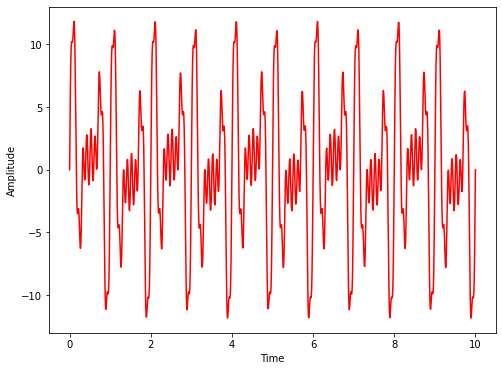

In [225]:
x1 = prepare_signal_1(amplitude, frequency, n, 10)

In [226]:
def prepare_signal_2(amplitude, frequency, n, b):
    xs = np.linspace(0, b, n)
    x = np.zeros(len(xs))
    interval = np.linspace(0, b, 6)
    k = 0
    for i in range(len(amplitude)):
        while(xs[k] < interval[i+1]):
            x[k] += amplitude[i]*np.sin(2*np.pi*frequency[i]*xs[k])
            k+=1
    plt.figure(figsize = (8, 6))
    plt.plot(xs, x, 'r')
    plt.xlabel("Time")
    plt.ylabel("Amplitude")
    plt.show()
    return x

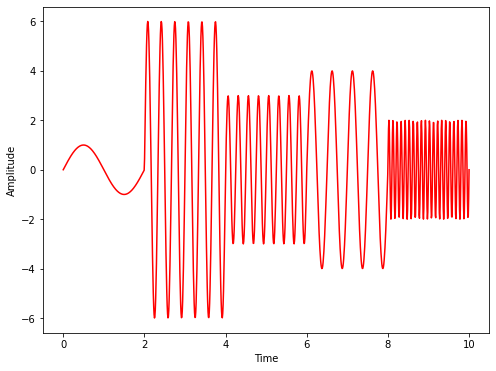

In [227]:
x2 = prepare_signal_2(amplitude, frequency, n, 10)

In [236]:
def plot(n, b, x):
    xs = np.linspace(0, b, n)
    X = my_fft(x)
    N = len(X)
    n = np.arange(N)
    plt.plot(n/10, abs(X/(N/2)))
    plt.ylabel("Normalized FFT Amplitude")
    plt.xlabel("Freq")
    plt.show()

Aby uzyskać odpowiednie amplitudę i częstotliwość, należy odpowiednio przygotować dane do wykresu. X jest wynikiem operacji FFT, aby je znormalizować dzielę je przez N/2. 

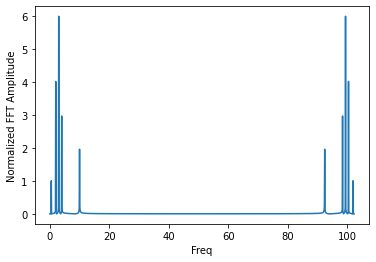

In [237]:
plot(n, 10, x1)

W przypadku pierwszego sygnału wartości z tabel frequency i amplitude zgadzają się z tymi na wykresie.

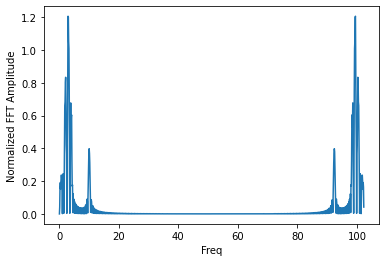

In [238]:
plot(n, 10, x2)

Drugi sygnał sprawił mi większy problem z interpretacją. Postanowiłam przybliżyć jedną część. 

In [239]:
def plot_2(n, b, x):
    xs = np.linspace(0, b, n)
    X = my_fft(x)
    N = len(X)
    n = np.arange(N)
    plt.plot(n/10, abs(X/(N/2)))
    plt.ylabel("Normalized FFT Amplitude")
    plt.xlabel("Freq")
    plt.xlim(0, 20)
    plt.show()

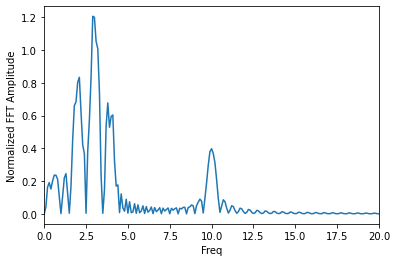

In [240]:
plot_2(n, 10, x2)

Częstotliwości się zgadzają, jednak jeśli chodzi o amplitudę, wydaje mi się, ze ta nieregularność wynika z tego, że sygnał x2 jest nieokresowy.

In [241]:
def plot_complex(x, n, b):
    xs = np.linspace(0, b, n)
    res = my_fft(x)
    plt.figure(figsize = (6, 4))
    plt.plot(xs, res.real)
    plt.xlabel("Time")
    plt.ylabel("Real")
    plt.show()
    plt.figure(figsize = (6, 4))
    plt.plot(xs, res.imag)
    plt.xlabel("Time")
    plt.ylabel("Imaginary")
    plt.show()

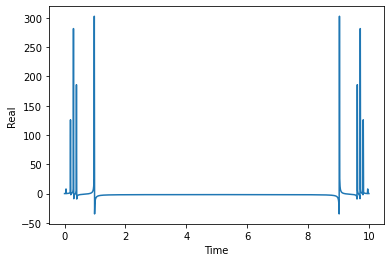

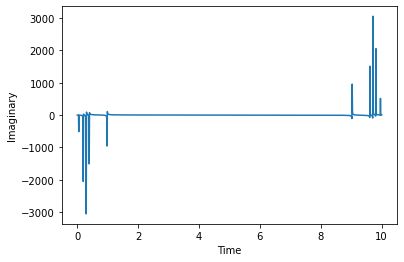

In [242]:
plot_complex(x1, n, 10)

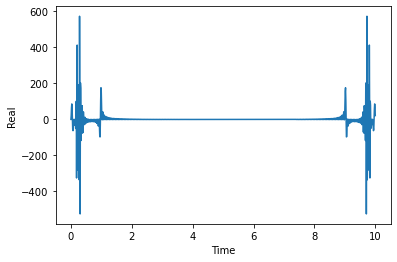

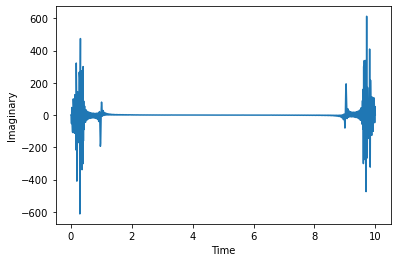

In [235]:
plot_complex(x2, n, 10)

Warto zauważyć, że w obu przypadkach wykres części rzeczywistej jest symetrzyczny a urojonej - asymetryczny.